## Datasets

### Preparando o ambiente

In [1]:
import os
import cv2
import json
import shutil
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


#### Target GGG

In [3]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.6 MB/s eta 0:00:00


In [4]:
import timm
len(timm.list_models(pretrained=True))

1298

In [ ]:
PROJECT_FOLDER = "/content/drive/MyDrive/Mestrado/Mestrado_CIn_2023/Deep_Learning_2023.2/Projeto"
DATASETS_PATH = f"{PROJECT_FOLDER}/Data"
BIRDS_PATH = f"{DATASETS_PATH}/BIRDS"
!ls {BIRDS_PATH}

 birds.csv				     test		      train_indices_dict.json
'EfficientNetB0-525-(224 X 224)- 98.97.h5'   test_indices_dict.json   valid
 groups.json				     train		      valid_indices_dict.json


In [5]:
PROJECT_FOLDER = "/content/drive/MyDrive/Mestrado_CIn_2023/Deep_Learning_2023.2/Projeto"
DATASETS_PATH = f"{PROJECT_FOLDER}/Data"
BIRDS_PATH = f"{DATASETS_PATH}/BIRDS"

#### Target GM

In [ ]:
PROJECT_FOLDER = "[...]"

#### Baixando o Dataset BIRDS

Contém +- 200 imagens por Classe;
525 Classes;

https://www.kaggle.com/datasets/gpiosenka/100-bird-*species*

In [ ]:
!pip install kaggle

In [ ]:
with open(f"{DATASETS_PATH}/kaggle.json") as file:
  kaggle_key = json.load(file)
os.environ['KAGGLE_USERNAME'] = kaggle_key['username']
os.environ['KAGGLE_KEY'] = kaggle_key['key']

In [ ]:
!kaggle datasets download -d gpiosenka/100-bird-species

In [ ]:
!unzip -q 100-bird-species.zip -d BIRDS/

In [ ]:
!cp -r BIRDS {DATASETS_PATH}

Checando se foi feita a cópia corretamente

In [ ]:
import pandas as pd
BIRDS_PATH = os.path.join(DATASETS_PATH,'BIRDS')
birds = pd.read_csv(f"{BIRDS_PATH}/birds.csv")
birds

,class id,filepaths,labels,data set,scientific name
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
...,...,...,...,...,...
89880,524.0,valid/BLACK BREASTED PUFFBIRD/3.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS
89881,524.0,valid/BLACK BREASTED PUFFBIRD/4.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS
89882,524.0,valid/BLACK BREASTED PUFFBIRD/1.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS
89883,524.0,valid/BLACK BREASTED PUFFBIRD/2.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS


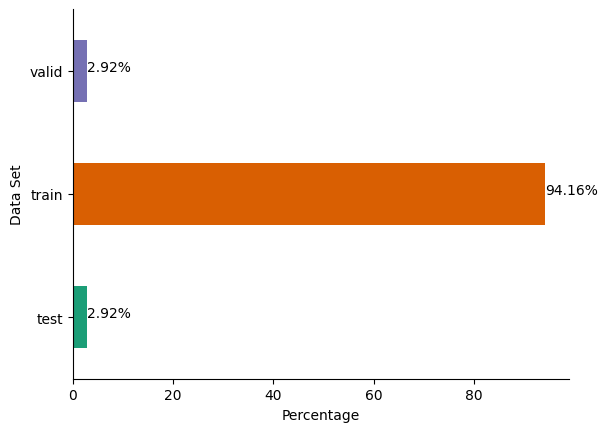

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Assuming birds is your DataFrame and 'data set' is the column of interest
grouped_data = birds.groupby('data set').size()
total = grouped_data.sum()
percentages = (grouped_data / total) * 100

# Plotting
percentages.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Percentage')
plt.ylabel('Data Set')

# Optionally, you can add the actual percentages on the bars
for index, value in enumerate(percentages):
    plt.text(value, index, f'{value:.2f}%')

plt.show()


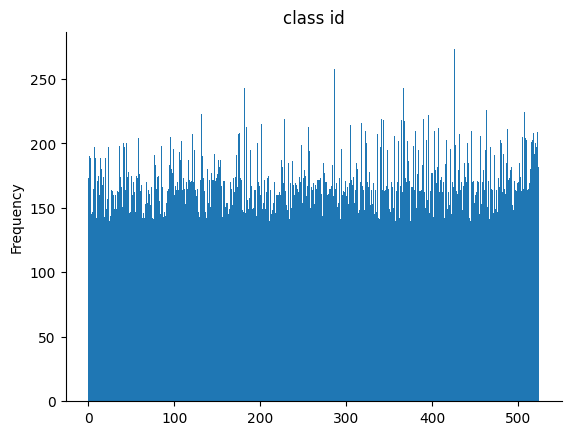

In [ ]:
from matplotlib import pyplot as plt
birds['class id'].plot(kind='hist', bins=525, title='class id')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Assuming 'data set' is the column representing the dataset and 'class id' is the category
data_sets = birds['data set'].unique()  # Get unique dataset names

## Hiera: A Hierarchical Vision Transformer without the Bells-and-Whistles

Hiera is a hierarchical vision transformer that is fast, powerful, and, above all, simple. It outperforms the state-of-the-art across a wide array of image and video tasks while being much faster.

In [6]:
!pip install hiera-transformer

Importando Bibliotecas, funções e classes úteis

In [7]:
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode
import torch.nn as nn
from PIL import Image
import hiera
from timm.data.constants import IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD

Carregando o modelo. As opões são:


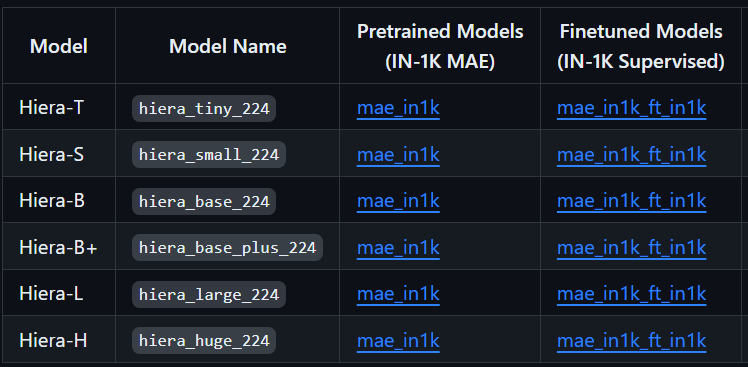

In [ ]:
# Carreagando o modelo, a menor versão de todas
model = hiera.hiera_tiny_224(pretrained=True, checkpoint="mae_in1k_ft_in1k")

Downloading: "https://dl.fbaipublicfiles.com/hiera/hiera_tiny_224.pth" to /root/.cache/torch/hub/checkpoints/hiera_tiny_224.pth
100%|██████████| 320M/320M [00:04<00:00, 81.6MB/s]


In [ ]:
# Numero de classes da base de análise de tecidos
num_classes = 25

# Substituindo ultima camada do modelo
model.head.projection = nn.Linear(in_features=768, out_features=num_classes)

# Reiniciando os pesos da ultima camada.
nn.init.kaiming_normal_(model.head.projection.weight, mode='fan_out', nonlinearity='relu')
print(model)


Hiera(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 96, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
  )
  (unroll): Unroll()
  (reroll): Reroll()
  (blocks): ModuleList(
    (0): HieraBlock(
      (norm1): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
      (attn): MaskUnitAttention(
        (qkv): Linear(in_features=96, out_features=288, bias=True)
        (proj): Linear(in_features=96, out_features=96, bias=True)
      )
      (norm2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=96, out_features=384, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Identity()
        (fc2): Linear(in_features=384, out_features=96, bias=True)
        (drop2): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
    )
    (1): HieraBlock(
      (norm1): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
      (attn): MaskUnitAttention(
      

Definição das transformações

In [ ]:
input_size = 224

# Lista para inserir as transformações de interesse
transform_list = [transforms.Resize((input_size,input_size)),  # Resize to a slightly larger size
                  ]
# Modelo de transformação que não converte para tensor, de modo que seja possível visualizar a imagem final
# (Isso tinha por padrão pq no modelo original eles fazer um zoom + crop central por algum motivo)
transform_vis  = transforms.Compose(transform_list)

# Convertendo para tensor e normalizando baseado na ImageNet
transform_norm = transforms.Compose(transform_list + [
    transforms.ToTensor(),
    transforms.Normalize(IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD),
])

### Treinamento

### Avaliando antes de realizar o treinamento, apenas com os pesos da base pré-treinada

In [ ]:
import timm
import torch
import random
import torchvision
from torchvision import transforms, datasets
import pandas as pd
from torch.utils.data import random_split
import numpy as np
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.cluster import KMeans
from tensorflow.keras.preprocessing import image

### New dataset organizer pipeline

#### Functions

In [ ]:
def split_and_move_for_calibration(dataset_base_path, num_images_per_class=5):
    """
    Move images from the 'train' subdirectory to a 'calibrate' subdirectory within each class.

    Parameters:
    dataset_base_path (str): The base path of the dataset containing 'train', 'test', etc.
    num_images_per_class (int): Number of images per class to move to the calibration set.
    """
    train_path = os.path.join(dataset_base_path, 'train')
    calibrate_path = os.path.join(dataset_base_path, 'calibrate')

    # Create the 'calibrate' directory if it doesn't exist
    if not os.path.exists(calibrate_path):
        os.makedirs(calibrate_path)

    # Iterate through each class in the 'train' directory
    for class_name in os.listdir(train_path):
        class_train_path = os.path.join(train_path, class_name)

        # Continue only if it's a directory
        if not os.path.isdir(class_train_path):
            continue

        # Create a corresponding class directory in 'calibrate'
        class_calibrate_path = os.path.join(calibrate_path, class_name)
        if not os.path.exists(class_calibrate_path):
            os.makedirs(class_calibrate_path)

        # Move the specified number of images to the 'calibrate' class directory
        images = os.listdir(class_train_path)[:num_images_per_class]
        for image in images:
            shutil.move(os.path.join(class_train_path, image), class_calibrate_path)

def load_hiera(num_classes):
    # Carreagando o modelo, a menor versão de todas
    model = hiera.hiera_tiny_224(pretrained=True, checkpoint="mae_in1k_ft_in1k")

    #Congelando o modelo
    for param in model.parameters():
      param.requires_grad = False

    # Substituindo ultima camada do modelo
    model.head.projection = nn.Linear(in_features=768, out_features=num_classes)

    # Reiniciando os pesos da ultima camada.
    nn.init.kaiming_normal_(model.head.projection.weight, mode='fan_out', nonlinearity='relu')
    # Numero de classes da base de análise de tecidos
    device = "cuda" if torch.cuda.is_available() else "cpu"

    model_device = next(model.parameters()).device

    if device == "cuda" and model_device.type == "cpu":
        model = model.to(device)
        print("Model moved to GPU")
    return model,device

def load_image_paths(dataset_path):
    cls_names = []
    image_paths = []
    train_path = os.path.join(dataset_path,'train')
    for cls in os.listdir(train_path):
      if os.path.isfile(os.path.join(train_path,cls,'1.jpg')):
        img_path = os.path.join(train_path,cls,'1.jpg')
      elif os.path.isfile(os.path.join(train_path,cls,'01.jpg')):
        img_path = os.path.join(train_path,cls,'01.jpg')
      elif os.path.isfile(os.path.join(train_path,cls,'001.jpg')):
        img_path = os.path.join(train_path,cls,'001.jpg')
      else:
        print("ERROR")
        return None
      image_paths.append(img_path)
      cls_names.append(cls)
    return image_paths,cls_names

def load_align_model():
  align_processor = AlignProcessor.from_pretrained('kakaobrain/align-base')
  align_model = AlignModel.from_pretrained('kakaobrain/align-base')
  device = "cuda" if torch.cuda.is_available() else "cpu"
  print("Current device:", device)

  model_device = next(align_model.parameters()).device
  print("Model's current device:", model_device)

  if device == "cuda" and model_device.type == "cpu":
      align_model = align_model.to(device)
      print("Model moved to GPU")
  return align_model,align_processor

def batch_image_processing(image_paths,model,processor):
  current_batch = []
  features = []
  for img_path in tqdm(image_paths):
    current_batch.append(os.path.join(img_path))
    if len(current_batch) == 5:
      features.extend(process_images_with_align(current_batch,model,processor))
      current_batch = []
  return features

def process_images_with_align(image_paths,model,processor):
    images = [Image.open(img_path) for img_path in image_paths]
    for idx in range(len(images)):
      images[idx] = transform_vis(images[idx])
    inputs = processor(images=images, return_tensors="pt")

    inputs = {k: v.to(device) for k, v in inputs.items()}
    features = model.get_image_features(**inputs)
    return features.detach().cpu().numpy()

def recluster_and_select_classes(features, class_labels, num_clusters=25, num_iterations=21):
    """
    Re-cluster and select classes, ensuring 25 classes are selected in each iteration.

    Parameters:
    features (array): The features of the classes used for clustering.
    class_labels (list): The original class labels corresponding to each feature.
    num_clusters (int): Number of clusters for K-means.
    num_iterations (int): Number of iterations to select classes.

    Returns:
    dict: A dictionary where keys are iteration numbers and values are lists of selected class labels.
    """
    selected_classes_per_iteration = {}
    all_selected_classes = set()

    for iteration in range(num_iterations):
        if iteration > 0 or 'cluster_labels' not in locals():
            # Re-run K-means clustering on the remaining classes
            remaining_features = [features[i] for i, cls in enumerate(class_labels) if cls not in all_selected_classes]
            remaining_labels = [cls for cls in class_labels if cls not in all_selected_classes]
            cluster_labels = kmeans_clustering(remaining_features, num_clusters)

            # Map new clusters to remaining class labels
            cluster_to_classes = map_clusters_to_classes(cluster_labels, remaining_labels)

        selected_classes = []
        print(f"\nIteration {iteration+1}/{num_iterations}:")

        for cluster, classes in cluster_to_classes.items():
            available_classes = [cls for cls in classes if cls not in all_selected_classes]
            print(f"  Cluster {cluster}: Available classes - {available_classes}")

            if available_classes:
                selected_class = random.choice(available_classes)
                selected_classes.append(selected_class)
                all_selected_classes.add(selected_class)
                print(f"    Selected class: {selected_class}")

            if len(selected_classes) == 25:
                break

        selected_classes_per_iteration[iteration] = selected_classes
        print(f"  Classes selected in this iteration: {selected_classes}")
        print(f"  Total selected classes so far: {len(all_selected_classes)}")

        # If all classes are selected, break the loop
        if len(all_selected_classes) == len(class_labels):
            break

    return selected_classes_per_iteration

def load_json(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

def create_subsets(dataset_path, groups_json_path):
    # Load dataset
    full_dataset = datasets.ImageFolder(root=dataset_path)
    class_to_idx = full_dataset.class_to_idx

    # Load groups from JSON
    groups = load_json(groups_json_path)

    # Dictionary to store indices for each group
    indices_dict = {}

    # Iterate over groups to create subsets
    for group_number, class_names in tqdm(groups.items(), desc="Creating subsets"):
        # Find indices for each class in the group
        group_indices = []
        for class_name in class_names:
            if class_name in class_to_idx:
                class_idx = class_to_idx[class_name]
                group_indices.extend([i for i, (_, label) in enumerate(full_dataset.samples) if label == class_idx])
            else:
                print(f"Class {class_name} not found in dataset")

        # Store indices in dictionary
        indices_dict[group_number] = group_indices

    return indices_dict

def get_combined_indices(indices_dict, num_groups):
    """
    Combine indices from multiple groups to create a larger group.

    Parameters:
    indices_dict (dict): Dictionary containing indices for each group.
    num_groups (int): Number of groups to combine.

    Returns:
    list: Combined indices from the specified number of groups.
    """
    combined_indices = []
    for i in range(num_groups):
        group_number = f'{i}'  # Adjust based on your group naming convention
        combined_indices.extend(indices_dict[group_number])
    return combined_indices

# Load your dataset (assuming you have a Subset)
def load_filter_remap_dataset(dataset_path,indices,transform):
  full_dataset = datasets.ImageFolder(root=dataset_path,transform=transform)
  filtered_dataset = torch.utils.data.Subset(full_dataset, indices)
  # Remap class indices
  remapped_train_dataset, class_mapping = remap_class_indices(filtered_dataset,transform)
  return remapped_train_dataset, class_mapping

def remap_class_indices(dataset, transform):
    """
    Remap class indices of a dataset to a new range (0 to N-1) and return a new ImageFolder dataset.

    Parameters:
    dataset (Subset): The dataset whose class indices are to be remapped.
    transform (transforms.Compose): Transformations to be applied to the dataset.

    Returns:
    Tuple[ImageFolder, dict]: A tuple containing the remapped dataset and a mapping dictionary.
    """
    unique_labels = set([dataset.dataset.samples[i][1] for i in dataset.indices])
    original_to_new_mapping = {original: new for new, original in enumerate(sorted(unique_labels))}

    # Create a new dataset with remapped labels
    remapped_samples = [(dataset.dataset.samples[i][0], original_to_new_mapping[dataset.dataset.samples[i][1]]) for i in dataset.indices]
    remapped_dataset = datasets.ImageFolder(dataset.dataset.root, transform=transform)
    remapped_dataset.samples = remapped_samples

    return remapped_dataset, original_to_new_mapping

In [ ]:
split_and_move_for_calibration(BIRDS_PATH, num_images_per_class=5)

#### Pipeline preparação dos datasets

In [ ]:
!pip install transformers

In [ ]:
from transformers import AlignProcessor, AlignModel

In [ ]:
image_paths, class_labels = load_image_paths(BIRDS_PATH)

model,processor = load_align_model()

features = batch_image_processing(image_paths,model,processor)

# Select classes from clusters
selected_classes_per_iteration = recluster_and_select_classes(features, class_labels, num_clusters=25, num_iterations=21)

In [ ]:
for key in selected_classes_per_iteration.keys():
  print(len(selected_classes_per_iteration[key]),selected_classes_per_iteration[key])

25 ['CANVASBACK', 'SUPERB STARLING', 'BALD IBIS', 'PATAGONIAN SIERRA FINCH', 'INDIGO FLYCATCHER', 'KING VULTURE', 'COCKATOO', 'RAINBOW LORIKEET', 'MASKED LAPWING', 'HAWFINCH', 'ABBOTTS BOOBY', 'FRIGATE', 'RED LEGGED HONEYCREEPER', 'BLUE THROATED PIPING GUAN', 'CRIMSON CHAT', 'FASCIATED WREN', 'SAND MARTIN', 'RUDY KINGFISHER', 'RED KNOT', 'BRANDT CORMARANT', 'CASPIAN TERN', 'CLARKS GREBE', 'GRAY PARTRIDGE', 'INCA TERN', 'GREAT POTOO']
25 ['CHUKAR PARTRIDGE', 'NORTHERN SHOVELER', 'GUINEAFOWL', 'BORNEAN LEAFBIRD', 'CLARKS NUTCRACKER', 'AMERICAN DIPPER', 'EASTERN WIP POOR WILL', 'INDIAN PITTA', 'CAPE MAY WARBLER', 'BLACK THROATED BUSHTIT', 'AFRICAN FIREFINCH', 'EMPEROR PENGUIN', 'OSPREY', 'BORNEAN BRISTLEHEAD', 'UMBRELLA BIRD', 'RED CROSSBILL', 'GOLDEN BOWER BIRD', 'NOISY FRIARBIRD', 'INDIAN BUSTARD', 'GREATER PEWEE', 'WHITE BREASTED WATERHEN', 'GREAT ARGUS', 'STRIPPED MANAKIN', 'AMERICAN AVOCET', 'ROSE BREASTED COCKATOO']
25 ['ALBATROSS', 'TASMANIAN HEN', 'GRAY KINGBIRD', 'VIOLET BACKED S

In [ ]:
import json
with open(f"{BIRDS_PATH}/groups.json",'w') as file:
  json.dump(selected_classes_per_iteration,file)

In [ ]:
# Paths
train_path = BIRDS_PATH + '/train'
valid_path = BIRDS_PATH + '/valid'
test_path = BIRDS_PATH + '/test'
calibrate_path = BIRDS_PATH + '/calibrate'
groups_json_path = f"{BIRDS_PATH}/groups.json"

# Create subsets
train_indices_dict = create_subsets(train_path, groups_json_path)
valid_indices_dict = create_subsets(valid_path, groups_json_path)
test_indices_dict = create_subsets(test_path, groups_json_path)
calibrate_indices_dict = create_subsets(calibrate_path, groups_json_path)

# Optionally, save the indices_dict as a JSON file for later use
with open(os.path.join(BIRDS_PATH, 'train_indices_dict.json'), 'w') as json_file:
    json.dump(train_indices_dict, json_file)

# Optionally, save the indices_dict as a JSON file for later use
with open(os.path.join(BIRDS_PATH, 'valid_indices_dict.json'), 'w') as json_file:
    json.dump(valid_indices_dict, json_file)

# Optionally, save the indices_dict as a JSON file for later use
with open(os.path.join(BIRDS_PATH, 'test_indices_dict.json'), 'w') as json_file:
    json.dump(test_indices_dict, json_file)

with open(os.path.join(BIRDS_PATH, 'calibrate_indices_dict.json'), 'w') as json_file:
    json.dump(calibrate_indices_dict, json_file)

Creating subsets:   0%|          | 0/21 [00:00<?, ?it/s]

Creating subsets:   0%|          | 0/21 [00:00<?, ?it/s]

Creating subsets:   0%|          | 0/21 [00:00<?, ?it/s]

Creating subsets:   0%|          | 0/21 [00:00<?, ?it/s]

#### Carregando datasets

In [ ]:
# Paths
train_path = BIRDS_PATH + '/train'
valid_path = BIRDS_PATH + '/valid'
test_path = BIRDS_PATH + '/test'
groups_json_path = f"{BIRDS_PATH}/groups.json"
# Optionally, save the indices_dict as a JSON file for later use
with open(os.path.join(BIRDS_PATH, 'train_indices_dict.json'), 'r') as json_file:
    train_indices_dict = json.load(json_file)

# Optionally, save the indices_dict as a JSON file for later use
with open(os.path.join(BIRDS_PATH, 'valid_indices_dict.json'), 'r') as json_file:
    valid_indices_dict = json.load(json_file)

# Optionally, save the indices_dict as a JSON file for later use
with open(os.path.join(BIRDS_PATH, 'test_indices_dict.json'), 'r') as json_file:
    test_indices_dict = json.load(json_file)

In [ ]:
# Load your dataset (assuming you have a Subset)
def load_filter_remap_dataset(dataset_path,indices,transform):
  full_dataset = datasets.ImageFolder(root=dataset_path,transform=transform)
  filtered_dataset = torch.utils.data.Subset(full_dataset, indices)
  # Remap class indices
  remapped_train_dataset, class_mapping = remap_class_indices(filtered_dataset,transform)
  return remapped_train_dataset, class_mapping

remapped_train_dataset, train_class_mapping = load_filter_remap_dataset(train_path,train_indices_dict['0'],transform_norm)
remapped_valid_dataset, valid_class_mapping = load_filter_remap_dataset(valid_path,valid_indices_dict['0'],transform_norm)
remapped_test_dataset, test_class_mapping = load_filter_remap_dataset(test_path,test_indices_dict['0'],transform_norm)

# Print class mapping for reference

for (train_original, train_new), (valid_original, valid_new), (test_original, test_new) in zip(train_class_mapping.items(), valid_class_mapping.items(), test_class_mapping.items()):
    print(f"Train Original Index: {train_original}, Train New Index: {train_new} | "
          f"Valid Original Index: {valid_original}, Valid New Index: {valid_new} | "
          f"Test Original Index: {test_original}, Test New Index: {test_new}")

Train Original Index: 1, Train New Index: 0 | Valid Original Index: 1, Valid New Index: 0 | Test Original Index: 1, Test New Index: 0
Train Original Index: 54, Train New Index: 1 | Valid Original Index: 54, Valid New Index: 1 | Test Original Index: 54, Test New Index: 1
Train Original Index: 102, Train New Index: 2 | Valid Original Index: 102, Valid New Index: 2 | Test Original Index: 102, Test New Index: 2
Train Original Index: 108, Train New Index: 3 | Valid Original Index: 108, Valid New Index: 3 | Test Original Index: 108, Test New Index: 3
Train Original Index: 126, Train New Index: 4 | Valid Original Index: 126, Valid New Index: 4 | Test Original Index: 126, Test New Index: 4
Train Original Index: 134, Train New Index: 5 | Valid Original Index: 134, Valid New Index: 5 | Test Original Index: 134, Test New Index: 5
Train Original Index: 150, Train New Index: 6 | Valid Original Index: 150, Valid New Index: 6 | Test Original Index: 150, Test New Index: 6
Train Original Index: 153, Tr

# Remaning code

Checando se resultado está Coerente

In [ ]:
from torch.utils.data import DataLoader

N_CLASSES = 25
# Batch size for the DataLoader
batch_size = 32

# Creating DataLoaders for each subset
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(remapped_valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(remapped_test_dataset, batch_size=batch_size, shuffle=False)
calibration_loader = DataLoader(calibration_subset, batch_size=batch_size, shuffle=False)


### Epoch

Definindo o paso a passo a ser realizado por época de treinamento

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Current device:", device)

model_device = next(model.parameters()).device
print("Model's current device:", model_device)

if device == "cuda" and model_device.type == "cpu":
    model = model.to(device)
    print("Model moved to GPU")

Current device: cuda
Model's current device: cpu
Model moved to GPU


In [ ]:
from torch.utils.data import DataLoader

def train_and_save_results(results_path,batch_size = 32,num_epochs = 20,groups_number = 21):
    # for idx in range(groups_number):
    idx = groups_number - 1
    training_index = idx + 1
    N_CLASSES = int(training_index*25)
    print(f"EXECUTING TRAINING NUMBER {training_index} WITH {N_CLASSES} CLASSES")
    model,device = load_hiera(N_CLASSES)

    train_path = BIRDS_PATH + '/train'
    valid_path = BIRDS_PATH + '/valid'
    test_path = BIRDS_PATH + '/test'
    calibrate_path = BIRDS_PATH + '/calibrate'

    with open(os.path.join(BIRDS_PATH, 'train_indices_dict.json'), 'r') as json_file:
        train_indices_dict = json.load(json_file)

    # Optionally, save the indices_dict as a JSON file for later use
    with open(os.path.join(BIRDS_PATH, 'valid_indices_dict.json'), 'r') as json_file:
        valid_indices_dict = json.load(json_file)

    # Optionally, save the indices_dict as a JSON file for later use
    with open(os.path.join(BIRDS_PATH, 'test_indices_dict.json'), 'r') as json_file:
        test_indices_dict = json.load(json_file)

    # Optionally, save the indices_dict as a JSON file for later use
    with open(os.path.join(BIRDS_PATH, 'calibrate_indices_dict.json'), 'r') as json_file:
        calibrate_indices_dict = json.load(json_file)

    remapped_train_dataset, train_class_mapping = load_filter_remap_dataset(train_path,get_combined_indices(train_indices_dict,training_index),transform_norm)
    remapped_valid_dataset, valid_class_mapping = load_filter_remap_dataset(valid_path,get_combined_indices(valid_indices_dict,training_index),transform_norm)
    # remapped_test_dataset, test_class_mapping = load_filter_remap_dataset(test_path,get_combined_indices(test_indices_dict,training_index),transform_norm)
    # remapped_calibrate_dataset, calibrate_class_mapping = load_filter_remap_dataset(calibrate_path,get_combined_indices(calibrate_indices_dict,training_index),transform_norm)
    # Batch size for the DataLoader


    # Creating DataLoaders for each subset
    train_loader = DataLoader(remapped_train_dataset, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(remapped_valid_dataset, batch_size=batch_size, shuffle=False)
    # test_loader = DataLoader(remapped_test_dataset, batch_size=batch_size, shuffle=False)
    # calibration_loader = DataLoader(remapped_calibrate_dataset, batch_size=batch_size, shuffle=True)
    summary  = epoch(model,train_loader,valid_loader,results_path,training_index,num_epochs=num_epochs)
    with open(os.path.join(results_path,'summary',f'summary_{training_index}.json'),'w') as file:
        json.dump(summary,file)

In [ ]:
from torch.optim import Adam

def epoch(model,train_loader,valid_loader,results_path, training_index, num_epochs = 2):
  summary = { #Dicionário que armazenará o resumo do estado do modelo, métricas e matriz confusões
      'f1_history':[],
      'acc_history':[],
      'train_loss_history':[],
      'val_loss_history': [],
      'auc': []
  }

  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # Definindo o device padrão como 'cuda'
   # Escolhendo número de épocas
  best_acc = 0.0
  lowest_loss = 10000000000000000

  # Set up the optimizer and criterion
  optimizer = Adam(model.parameters(), lr=1e-4)
  criterion = nn.CrossEntropyLoss()

  # Training loop
  for epoch in range(num_epochs):
      val_loss = 0
      train_loss = 0
      model.cuda()
      model.train()
      training_logits = []
      for images, labels in tqdm(train_loader):
          images, labels = images.to(device), labels.to(device)
          optimizer.zero_grad()
          outputs = model(images)
          loss = criterion(outputs, labels)
          train_loss += loss.item()
          loss.backward()
          optimizer.step()
          training_logits.append(outputs.cpu().detach().numpy())
      train_loss /= len(train_loader)

      # Validation loop
      model.eval()
      all_labels = []
      all_preds = []
      all_logits = []
      with torch.no_grad():
          for images, labels in tqdm(valid_loader):
              images, labels = images.to(device), labels.to(device)
              outputs = model(images)
              loss = criterion(outputs, labels)
              val_loss += loss.item()
              _, predicted = torch.max(outputs.data, 1)
              all_labels.append(labels.cpu().numpy())
              all_preds.append(predicted.cpu().numpy())
              all_logits.append(outputs.cpu().numpy())

      val_loss /= len(valid_loader)

      # Flatten the list of results
      all_labels = np.concatenate(all_labels)
      all_preds = np.concatenate(all_preds)
      all_logits = np.concatenate(all_logits)
      training_logits = np.concatenate(training_logits)
      # all_labels_oneshot = np.eye(N_CLASSES)[all_labels]
      # Compute accuracy and confusion matrix
      accuracy = accuracy_score(all_labels, all_preds)
      conf_matrix = confusion_matrix(all_labels, all_preds)
      f1 = f1_score(y_true=all_labels, y_pred=all_preds, average='weighted')
      auc = roc_auc_score(all_labels,all_logits, multi_class='ovr')
      #Salvando métricas, estado do modelo e matriz confusão
      np.save(os.path.join(results_path,'confusion_matrix', f'conf_matrix_t{training_index}_e{epoch}.npy'), conf_matrix)
      summary['f1_history'].append(f1)
      summary['acc_history'].append(accuracy)
      summary['train_loss_history'].append(train_loss)
      summary['val_loss_history'].append(val_loss)
      summary['auc'].append(auc)
      # summary['calibrate'].append((ece, nll, mse, accu, ci, entropy))
      if accuracy > best_acc:
        best_acc = accuracy
      if val_loss < lowest_loss:
        torch.save(model.state_dict(), os.path.join(results_path,'model_state', f'model_state_t{training_index}_e{epoch}.pth'))
        lowest_loss = val_loss
      print(f'Validation Accuracy: {accuracy * 100:.2f}%')
      # print(f'Confusion Matrix:\n{conf_matrix}')
      print(f"Epoch {epoch+1}/{num_epochs}, Validation Accuracy: {accuracy} | Valitation Loss: {loss.item()} ")
      if epoch+1 == num_epochs:
         torch.save(model.state_dict(), os.path.join(results_path,'model_state', f'model_state_t{training_index}_e{epoch}.pth'))
  return summary

In [ ]:
train_and_save_results(f'{PROJECT_FOLDER}/Results',batch_size=96,num_epochs=20,groups_number=5)

EXECUTING TRAINING NUMBER 5 WITH 125 CLASSES
Model moved to GPU


  0%|          | 0/205 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Validation Accuracy: 97.44%
Epoch 1/20, Validation Accuracy: 0.9744 | Valitation Loss: 3.9093830585479736 


  0%|          | 0/205 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Validation Accuracy: 97.28%
Epoch 2/20, Validation Accuracy: 0.9728 | Valitation Loss: 3.9023184776306152 


  0%|          | 0/205 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Validation Accuracy: 99.04%
Epoch 3/20, Validation Accuracy: 0.9904 | Valitation Loss: 3.8530168533325195 


  0%|          | 0/205 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Validation Accuracy: 98.72%
Epoch 4/20, Validation Accuracy: 0.9872 | Valitation Loss: 3.8753702640533447 


  0%|          | 0/205 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Validation Accuracy: 99.04%
Epoch 5/20, Validation Accuracy: 0.9904 | Valitation Loss: 3.857484817504883 


  0%|          | 0/205 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Validation Accuracy: 99.68%
Epoch 6/20, Validation Accuracy: 0.9968 | Valitation Loss: 3.8491578102111816 


  0%|          | 0/205 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Validation Accuracy: 99.68%
Epoch 7/20, Validation Accuracy: 0.9968 | Valitation Loss: 3.8450000286102295 


  0%|          | 0/205 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Validation Accuracy: 99.68%
Epoch 8/20, Validation Accuracy: 0.9968 | Valitation Loss: 3.844252824783325 


  0%|          | 0/205 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Validation Accuracy: 99.68%
Epoch 9/20, Validation Accuracy: 0.9968 | Valitation Loss: 3.844015598297119 


  0%|          | 0/205 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Validation Accuracy: 99.68%
Epoch 10/20, Validation Accuracy: 0.9968 | Valitation Loss: 3.8438947200775146 


  0%|          | 0/205 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Validation Accuracy: 99.68%
Epoch 11/20, Validation Accuracy: 0.9968 | Valitation Loss: 3.8437018394470215 


  0%|          | 0/205 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Validation Accuracy: 99.68%
Epoch 12/20, Validation Accuracy: 0.9968 | Valitation Loss: 3.8435137271881104 


  0%|          | 0/205 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Validation Accuracy: 99.68%
Epoch 13/20, Validation Accuracy: 0.9968 | Valitation Loss: 3.843505859375 


  0%|          | 0/205 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Validation Accuracy: 99.68%
Epoch 14/20, Validation Accuracy: 0.9968 | Valitation Loss: 3.8433165550231934 


  0%|          | 0/205 [00:00<?, ?it/s]

# Calibração

Vamos usar a função ets_calibrate para calibrar a base dos pássaros (muitas classes), e a função mir_calibrate para calibrar a base de raio x (poucas classes);

As funções recebem:


*   logit - array de logits da base de calibração com dimensões (n_instances, n_classes);
*   label - array de true labels da base de calibração no formato de one-hot encoding com dimensões (n_instances, n_classes);
*   logit_eval - array de logits da base de teste com dimensões (n_instances,n_classes);
*   n_class - inteiro com a quantidade de classes;
*   loss - string informando o tipo de loss que será utilizada, pode ser 'mse' ou 'ce'. Porém vamos utilizar a 'mse'.



In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: Jize Zhang
"""

import numpy as np
from scipy import optimize
from sklearn.isotonic import IsotonicRegression

"""
auxiliary functions for optimizing the temperature (scaling approaches) and weights of ensembles
*args include logits and labels from the calibration dataset:
"""

def mse_t(t, *args):
## find optimal temperature with MSE loss function

    logit, label = args
    logit = logit/t
    n = np.sum(np.exp(logit),1)
    p = np.exp(logit)/n[:,None]
    mse = np.mean((p-label)**2)
    return mse


def ll_t(t, *args):
## find optimal temperature with Cross-Entropy loss function

    logit, label = args
    logit = logit/t
    n = np.sum(np.exp(logit),1)
    p = np.clip(np.exp(logit)/n[:,None],1e-20,1-1e-20)
    N = p.shape[0]
    ce = -np.sum(label*np.log(p))/N
    return ce



def mse_w(w, *args):
## find optimal weight coefficients with MSE loss function

    p0, p1, p2, label = args
    p = w[0]*p0+w[1]*p1+w[2]*p2
    p = p/np.sum(p,1)[:,None]
    mse = np.mean((p-label)**2)
    return mse


def ll_w(w, *args):
## find optimal weight coefficients with Cros-Entropy loss function

    p0, p1, p2, label = args
    p = (w[0]*p0+w[1]*p1+w[2]*p2)
    N = p.shape[0]
    ce = -np.sum(label*np.log(p))/N
    return ce


##### Ftting Temperature Scaling
def temperature_scaling(logit,label,loss):

    bnds = ((0.05, 5.0),)
    if loss == 'ce':
       t = optimize.minimize(ll_t, 1.0 , args = (logit,label), method='L-BFGS-B', bounds=bnds, tol=1e-12)
    if loss == 'mse':
        t = optimize.minimize(mse_t, 1.0 , args = (logit,label), method='L-BFGS-B', bounds=bnds, tol=1e-12)
    t = t.x
    return t



##### Ftting Enseble Temperature Scaling
def ensemble_scaling(logit,label,loss,t,n_class):

    p1 = np.exp(logit)/np.sum(np.exp(logit),1)[:,None]
    logit = logit/t
    p0 = np.exp(logit)/np.sum(np.exp(logit),1)[:,None]
    p2 = np.ones_like(p0)/n_class


    bnds_w = ((0.0, 1.0),(0.0, 1.0),(0.0, 1.0),)
    def my_constraint_fun(x): return np.sum(x)-1
    constraints = { "type":"eq", "fun":my_constraint_fun,}
    if loss == 'ce':
        w = optimize.minimize(ll_w, (1.0, 0.0, 0.0) , args = (p0,p1,p2,label), method='SLSQP', constraints = constraints, bounds=bnds_w, tol=1e-12, options={'disp': True})
    if loss == 'mse':
        w = optimize.minimize(mse_w, (1.0, 0.0, 0.0) , args = (p0,p1,p2,label), method='SLSQP', constraints = constraints, bounds=bnds_w, tol=1e-12, options={'disp': True})
    w = w.x
    return w





"""
Calibration:
Input: uncalibrated logits, temperature (and weight)
Output: calibrated prediction probabilities
"""

##### Calibration: Temperature Scaling with MSE
def ts_calibrate(logit,label,logit_eval,loss):
    t = temperature_scaling(logit,label,loss)
    print("temperature = " +str(t))
    logit_eval = logit_eval/t
    p = np.exp(logit_eval)/np.sum(np.exp(logit_eval),1)[:,None]
    return p


##### Calibration: Ensemble Temperature Scaling
def ets_calibrate(logit,label,logit_eval,n_class,loss):
    t = temperature_scaling(logit,label,loss='mse') # loss can change to 'ce'
    print("temperature = " +str(t))
    w = ensemble_scaling(logit,label,'mse',t,n_class)
    print("weight = " +str(w))



    p1 = np.exp(logit_eval)/np.sum(np.exp(logit_eval),1)[:,None]
    logit_eval = logit_eval/t
    p0 = np.exp(logit_eval)/np.sum(np.exp(logit_eval),1)[:,None]
    p2 = np.ones_like(p0)/n_class
    p = w[0]*p0 + w[1]*p1 +w[2]*p2
    return p



##### Calibration: Isotonic Regression (Multi-class)
def mir_calibrate(logit,label,logit_eval):
    p = np.exp(logit)/np.sum(np.exp(logit),1)[:,None]
    p_eval = np.exp(logit_eval)/np.sum(np.exp(logit_eval),1)[:,None]
    ir = IsotonicRegression(out_of_bounds='clip')
    y_ = ir.fit_transform(p.flatten(), (label.flatten()))
    yt_ = ir.predict(p_eval.flatten())

    p = yt_.reshape(logit_eval.shape)+1e-9*p_eval
    return p

def irova_calibrate(logit,label,logit_eval):
    p = np.exp(logit)/np.sum(np.exp(logit),1)[:,None]
    p_eval = np.exp(logit_eval)/np.sum(np.exp(logit_eval),1)[:,None]


    for ii in range(p_eval.shape[1]):
        ir = IsotonicRegression(out_of_bounds='clip')
        y_ = ir.fit_transform(p[:,ii], label[:,ii])
        p_eval[:,ii] = ir.predict(p_eval[:,ii])+1e-9*p_eval[:,ii]
    return p_eval
    return p_eval

In [ ]:
!pip install kdepy

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Dec 18 22:58:58 2019

@author: zhang64
"""


import torch
import numpy as np
import torch.nn.parallel

from KDEpy import FFTKDE


def mirror_1d(d, xmin=None, xmax=None):
    """If necessary apply reflecting boundary conditions."""
    if xmin is not None and xmax is not None:
        xmed = (xmin+xmax)/2
        return np.concatenate(((2*xmin-d[d < xmed]).reshape(-1,1), d, (2*xmax-d[d >= xmed]).reshape(-1,1)))
    elif xmin is not None:
        return np.concatenate((2*xmin-d, d))
    elif xmax is not None:
        return np.concatenate((d, 2*xmax-d))
    else:
        return d


def ece_kde_binary(p,label,p_int=None,order=1):

    # points from numerical integration
    if p_int is None:
        p_int = np.copy(p)

    p = np.clip(p,1e-256,1-1e-256)
    p_int = np.clip(p_int,1e-256,1-1e-256)


    x_int = np.linspace(-0.6, 1.6, num=2**14)


    N = p.shape[0]

    # this is needed to convert labels from one-hot to conventional form
    label_index = np.array([np.where(r==1)[0][0] for r in label])
    with torch.no_grad():
        if p.shape[1] !=2:
            p_new = torch.from_numpy(p)
            p_b = torch.zeros(N,1)
            label_binary = np.zeros((N,1))
            for i in range(N):
                pred_label = int(torch.argmax(p_new[i]).numpy())
                if pred_label == label_index[i]:
                    label_binary[i] = 1
                p_b[i] = p_new[i,pred_label]/torch.sum(p_new[i,:])
        else:
            p_b = torch.from_numpy((p/np.sum(p,1)[:,None])[:,1])
            label_binary = label_index

    method = 'triweight'

    dconf_1 = (p_b[np.where(label_binary==1)].reshape(-1,1)).numpy()
    kbw = np.std(p_b.numpy())*(N*2)**-0.2
    kbw = np.std(dconf_1)*(N*2)**-0.2
    # Mirror the data about the domain boundary
    low_bound = 0.0
    up_bound = 1.0
    dconf_1m = mirror_1d(dconf_1,low_bound,up_bound)
    # Compute KDE using the bandwidth found, and twice as many grid points
    pp1 = FFTKDE(bw=kbw, kernel=method).fit(dconf_1m).evaluate(x_int)
    pp1[x_int<=low_bound] = 0  # Set the KDE to zero outside of the domain
    pp1[x_int>=up_bound] = 0  # Set the KDE to zero outside of the domain
    pp1 = pp1 * 2  # Double the y-values to get integral of ~1


    p_int = p_int/np.sum(p_int,1)[:,None]
    N1 = p_int.shape[0]
    with torch.no_grad():
        p_new = torch.from_numpy(p_int)
        pred_b_int = np.zeros((N1,1))
        if p_int.shape[1]!=2:
            for i in range(N1):
                pred_label = int(torch.argmax(p_new[i]).numpy())
                pred_b_int[i] = p_int[i,pred_label]
        else:
            for i in range(N1):
                pred_b_int[i] = p_int[i,1]

    low_bound = 0.0
    up_bound = 1.0
    pred_b_intm = mirror_1d(pred_b_int,low_bound,up_bound)
    # Compute KDE using the bandwidth found, and twice as many grid points
    pp2 = FFTKDE(bw=kbw, kernel=method).fit(pred_b_intm).evaluate(x_int)
    pp2[x_int<=low_bound] = 0  # Set the KDE to zero outside of the domain
    pp2[x_int>=up_bound] = 0  # Set the KDE to zero outside of the domain
    pp2 = pp2 * 2  # Double the y-values to get integral of ~1


    if p.shape[1] !=2: # top label (confidence)
        perc = np.mean(label_binary)
    else: # or joint calibration for binary cases
        perc = np.mean(label_index)

    integral = np.zeros(x_int.shape)
    reliability= np.zeros(x_int.shape)
    for i in range(x_int.shape[0]):
        conf = x_int[i]
        if np.max([pp1[np.abs(x_int-conf).argmin()],pp2[np.abs(x_int-conf).argmin()]])>1e-6:
            accu = np.min([perc*pp1[np.abs(x_int-conf).argmin()]/pp2[np.abs(x_int-conf).argmin()],1.0])
            if np.isnan(accu)==False:
                integral[i] = np.abs(conf-accu)**order*pp2[i]
                reliability[i] = accu
        else:
            if i>1:
                integral[i] = integral[i-1]

    ind = np.where((x_int >= 0.0) & (x_int <= 1.0))
    return np.trapz(integral[ind],x_int[ind])/np.trapz(pp2[ind],x_int[ind])


def ece_hist_binary(p, label, n_bins = 15, order=1):

    p = np.clip(p,1e-256,1-1e-256)

    N = p.shape[0]
    label_index = np.array([np.where(r==1)[0][0] for r in label]) # one hot to index
    with torch.no_grad():
        if p.shape[1] !=2:
            preds_new = torch.from_numpy(p)
            preds_b = torch.zeros(N,1)
            label_binary = np.zeros((N,1))
            for i in range(N):
                pred_label = int(torch.argmax(preds_new[i]).numpy())
                if pred_label == label_index[i]:
                    label_binary[i] = 1
                preds_b[i] = preds_new[i,pred_label]/torch.sum(preds_new[i,:])
        else:
            preds_b = torch.from_numpy((p/np.sum(p,1)[:,None])[:,1])
            label_binary = label_index

        confidences = preds_b
        accuracies = torch.from_numpy(label_binary)


        x = confidences.numpy()
        x = np.sort(x,axis=0)
        binCount = int(len(x)/n_bins) #number of data points in each bin
        bins = np.zeros(n_bins) #initialize the bins values
        for i in range(0, n_bins, 1):
            bins[i] = x[min((i+1) * binCount,x.shape[0]-1)]
            #print((i+1) * binCount)
        bin_boundaries = torch.zeros(len(bins)+1,1)
        bin_boundaries[1:] = torch.from_numpy(bins).reshape(-1,1)
        bin_boundaries[0] = 0.0
        bin_boundaries[-1] = 1.0
        bin_lowers = bin_boundaries[:-1]
        bin_uppers = bin_boundaries[1:]


        ece_avg = torch.zeros(1)
        for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
            # Calculated |confidence - accuracy| in each bin
            in_bin = confidences.gt(bin_lower.item()) * confidences.le(bin_upper.item())
            prop_in_bin = in_bin.float().mean()
            #print(prop_in_bin)
            if prop_in_bin.item() > 0:
                accuracy_in_bin = accuracies[in_bin].float().mean()
                avg_confidence_in_bin = confidences[in_bin].mean()
                ece_avg += torch.abs(avg_confidence_in_bin - accuracy_in_bin)**order * prop_in_bin
    return ece_avg

def shannon_entropy(probabilities):
    # Ensure probabilities sum up to 1 along the last axis (classes)
    probabilities = np.clip(probabilities, 1e-15, 1.0)  # Avoid log(0)
    normalized_probs = probabilities / np.sum(probabilities, axis=-1, keepdims=True)

    # Calculate Shannon Entropy
    entropy = -np.sum(normalized_probs * np.log2(normalized_probs), axis=-1)
    return entropy


def ece_eval_binary(p, label):
    mse = np.mean(np.sum((p-label)**2,1)) # Mean Square Error
    N = p.shape[0]
    nll = -np.sum(label*np.log(p))/N # log_likelihood
    accu = (np.sum((np.argmax(p,1)-np.array([np.where(r==1)[0][0] for r in label]))==0)/p.shape[0]) # Accuracy
    ece = ece_hist_binary(p,label).cpu().numpy() # ECE
    # or if KDE is used
    ece = ece_kde_binary(p,label)
    ci = np.array([accu-(1.96*(mse/N)),accu+(1.96*(mse/N))])
    entropy = shannon_entropy(p)

    return ece, nll, mse, accu, ci, entropy

In [ ]:
# Exemplo de como rodar a calibração e avaliação

p_eval = ets_calibrate(logit,label,logit_eval,100,'mse')                  #os labels usados na função ets_calibrate são os labels do conjunto de calibração
ece, nll, mse, accu, ci, entropy = ece_eval_binary(p_eval,label_eval)    #equanto os labels usados na função eve_eval_binary são os labels do conjunto de teste

NameError: ignored

### Plot metrics

1. F1 e Accuracy

In [ ]:
print(f"Melhor acurária durante o processo de treino: {best_acc*100:.2f} %")

Melhor acurária durante o processo de treino: 98.40 %


Plotando a acurácia e loss de cada época

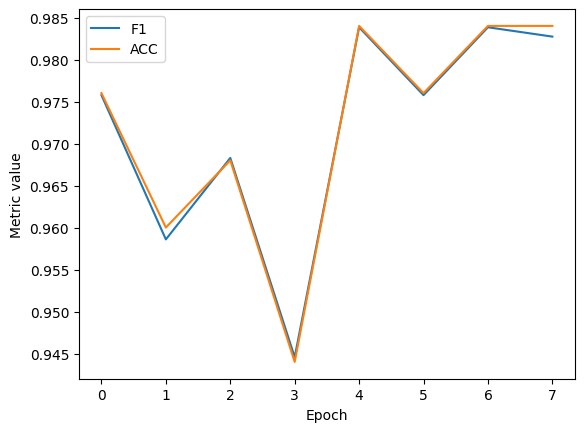

In [ ]:
plt.plot(summary['f1_history'], label='F1')
plt.plot(summary['acc_history'], label='ACC')
plt.legend()

plt.xlabel('Epoch')
plt.ylabel('Metric value')

plt.show()

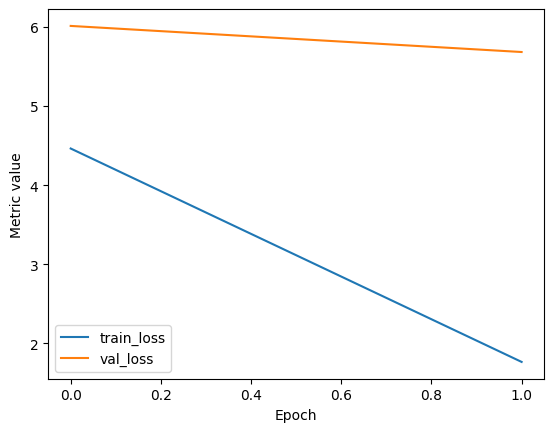

In [ ]:
plt.plot(summary['train_loss_history'], label='train_loss')
plt.plot(summary['val_loss_history'], label='val_loss')
plt.legend()

plt.xlabel('Epoch')
plt.ylabel('Metric value')

plt.show()

Plotando todas as matrizes confusão

## ResNet

In [ ]:
!pip install timm

In [ ]:
import timm
import torch
from torchvision import transforms, datasets
from torch.utils.data import random_split
import numpy as np
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [ ]:
# Criando o ImageFolder completo
full_dataset = datasets.ImageFolder(root=DATASETS_FOLDER + '/CRC-VAL-HE-7K', transform=transform_norm)

# Dividindo o dataset
train_size = int(0.75 * len(full_dataset))
val_size = len(full_dataset) - train_size

train_data, val_data = random_split(full_dataset, [train_size, val_size])

# Aplicando transformações de treino somente no conjunto de treino
train_data.dataset.transform = transform_norm

In [ ]:
def count_images_per_class(subset, dataset):

    imgs = dataset.imgs
    count= np.zeros((9,),int)
    for idx in subset.indices:
      count[imgs[idx][1]] += 1

    return count

train_counts = count_images_per_class(train_data, full_dataset)
valid_counts = count_images_per_class(val_data, full_dataset)

print("Treino:", train_counts)
print("Validação:", valid_counts)


Treino: [987 613 264 480 787 438 571 317 928]
Validação: [351 234  75 154 248 154 170 104 305]


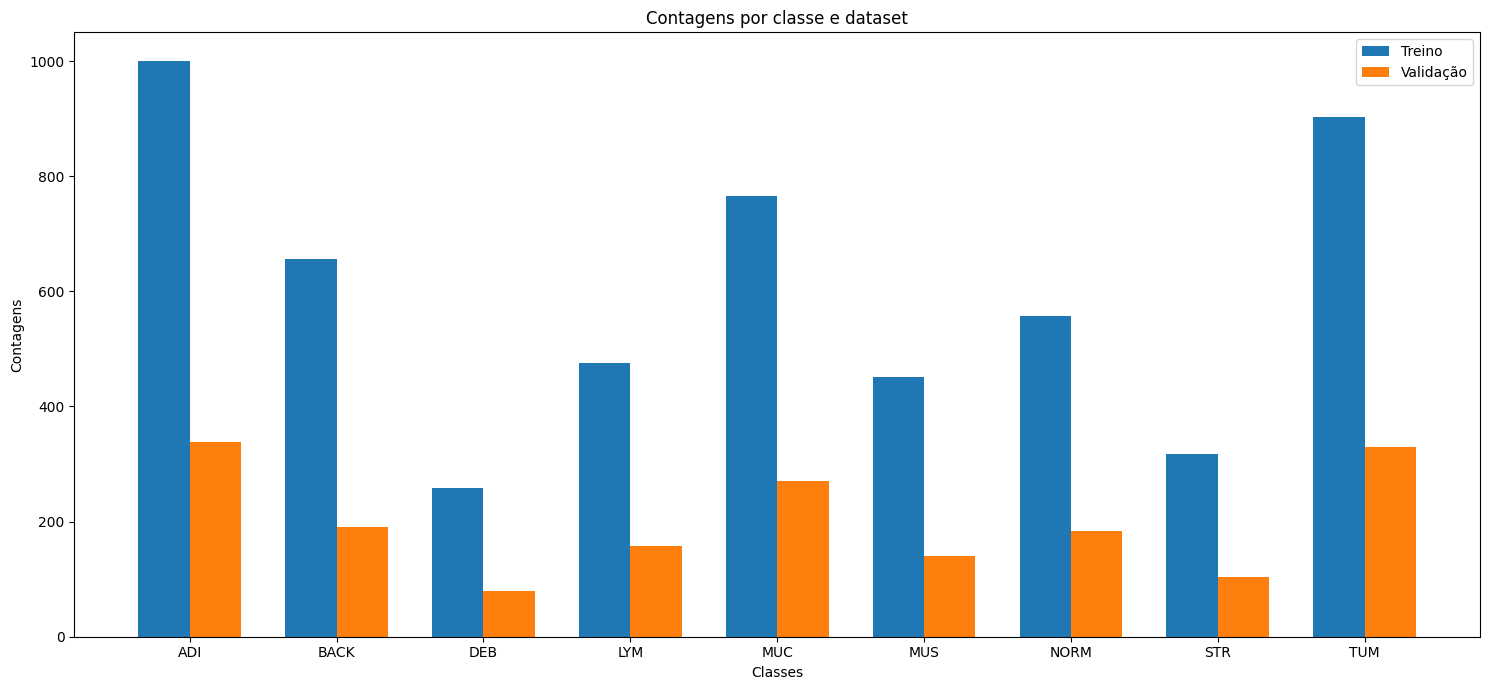

In [ ]:
# Criação do gráfico de barras
labels = [f'Classe {i}' for i in range(len(train_counts))]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(15,7))

rects1 = ax.bar(x - width/2, train_counts, width, label='Treino')
rects2 = ax.bar(x + width/2, valid_counts, width, label='Validação')
labels = ['ADI','BACK','DEB','LYM','MUC','MUS','NORM','STR','TUM']
# Adicionando legendas, título e labels
ax.set_xlabel('Classes')
ax.set_ylabel('Contagens')
ax.set_title('Contagens por classe e dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0)
ax.legend()

# Mostrando o gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Criando o ImageFolder completo
full_dataset = datasets.ImageFolder(root=DATASETS_FOLDER + '/NCT-CRC-HE-100K', transform=transform_norm)

# Dividindo o dataset
train_size = int(0.75 * len(full_dataset))
val_size = len(full_dataset) - train_size

train_data, val_data = random_split(full_dataset, [train_size, val_size])

# Aplicando transformações de treino somente no conjunto de treino
train_data.dataset.transform = transform_norm

In [ ]:
train_counts = count_images_per_class(train_data, full_dataset)
valid_counts = count_images_per_class(val_data, full_dataset)

print("Treino:", train_counts)
print("Validação:", valid_counts)


In [ ]:
# Criação do gráfico de barras
labels = [f'Classe {i}' for i in range(len(train_counts))]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(15,7))

rects1 = ax.bar(x - width/2, train_counts, width, label='Treino')
rects2 = ax.bar(x + width/2, valid_counts, width, label='Validação')
labels = ['ADI','BACK','DEB','LYM','MUC','MUS','NORM','STR','TUM']
# Adicionando legendas, título e labels
ax.set_xlabel('Classes')
ax.set_ylabel('Contagens')
ax.set_title('Contagens por classe e dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0)
ax.legend()

# Mostrando o gráfico
plt.tight_layout()
plt.show()

### Treinamento

### Avaliando antes de realizar o treinamento, apenas com os pesos da base pré-treinada

In [ ]:
model = timm.create_model('resnet50', pretrained=True, num_classes=9) #são 9 classes
x     = torch.randn(1, 3, 224, 224) #criando um objeto aleatório exemplo para testar output do modelo
model(x).shape #O print deve ser [1,67] para garantir que o output tem 9 classes

torch.Size([1, 9])

In [ ]:
model.pretrained_cfg

{'url': 'https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth',
 'hf_hub_id': 'timm/resnet50.a1_in1k',
 'architecture': 'resnet50',
 'tag': 'a1_in1k',
 'custom_load': False,
 'input_size': (3, 224, 224),
 'test_input_size': (3, 288, 288),
 'fixed_input_size': False,
 'interpolation': 'bicubic',
 'crop_pct': 0.95,
 'test_crop_pct': 1.0,
 'crop_mode': 'center',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'num_classes': 1000,
 'pool_size': (7, 7),
 'first_conv': 'conv1',
 'classifier': 'fc',
 'origin_url': 'https://github.com/huggingface/pytorch-image-models',
 'paper_ids': 'arXiv:2110.00476'}

In [ ]:
# Definindo tamanho dos batches
batch_size = 64
# Carregando os dados com dataloader
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)

# Iterate through the DataLoader
for inputs, labels in train_dataloader:
    print(inputs.shape, labels)
    #print(labels.min(), labels.max())
    break

torch.Size([64, 3, 224, 224]) tensor([0, 4, 1, 8, 8, 6, 8, 8, 6, 4, 3, 4, 3, 6, 5, 3, 6, 8, 0, 4, 6, 4, 6, 0,
        6, 1, 2, 8, 3, 8, 3, 8, 6, 0, 0, 1, 2, 2, 1, 4, 1, 6, 6, 8, 3, 4, 0, 1,
        0, 0, 8, 8, 3, 1, 0, 2, 5, 8, 4, 6, 6, 2, 3, 4])


### Epoch

Definindo o paso a passo a ser realizado por época de treinamento

In [ ]:
def epoch(dataloader, model, criterion, optimizer):
  model.cuda()
  model.train()

  epoch_loss = 0.0
  num_batches = 0
  correct_predictions = 0.0
  total_samples = 0.0
  for x, y in tqdm(dataloader):
    # erase the current model gradients
    optimizer.zero_grad()

    # forward
    logits = model(x.cuda())
    loss = criterion(input=logits, target=y.cuda())

    # backward
    loss.backward()

    # weights update ~ w = w_cur - lr*grad(loss, w)
    optimizer.step()

    epoch_loss += loss.detach().cpu().item()
    num_batches += 1

  return epoch_loss/num_batches

### Pipeline



1.   Define criterion (https://pytorch.org/docs/stable/nn.html#loss-functions)
2.   Define optimizer (https://pytorch.org/docs/stable/optim.html)
3.   Define hyperparameters (i.e. num epochs, learning rate, ...)
4.   Training loop



In [ ]:
def evaluate(dataloader, model,criterion):
  model.cuda() #ativando o cuda
  model.eval() #Ativando modo de avaliação

  targets = []
  all_preds = []

  for x, y in tqdm(dataloader):
    logits = model(x.cuda()) #passando as imagens do dataloder patch a patch e rodando através do cuda
    loss = criterion(input=logits, target=y.cuda())
    pred = logits.argmax(1).flatten().cpu().tolist()

    targets.extend(y.cpu().tolist())
    all_preds.extend(pred)

  acc = accuracy_score(y_true=targets, y_pred=all_preds)
  cm = confusion_matrix(y_true=targets, y_pred=all_preds)
  f1 = f1_score(y_true=targets, y_pred=all_preds, average='weighted')

  return acc,cm,f1,loss

# acc,cm,f1 = evaluate(test_dataloader, model)

In [ ]:
from torch.optim import Adam

summary = { #Dicionário que armazenará o resumo do estado do modelo, métricas e matriz confusões
    'model_state':None,
    'f1_history':[],
    'acc_history':[],
    'cm_history':[],
    'train_loss_history':[],
    'val_loss_history': []
}

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # Definindo o device padrão como 'cuda'
num_epochs = 10 # Escolhendo número de épocas
best_acc = 0.0


# Set up the optimizer and criterion
optimizer = Adam(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()

# Training loop
for epoch in range(num_epochs):
    val_loss = 0
    train_loss = 0
    model.cuda()
    model.train()
    for images, labels in tqdm(train_dataloader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
    train_loss /= len(train_dataloader)

    # Validation loop
    model.eval()
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for images, labels in tqdm(test_dataloader):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            all_labels.append(labels.cpu().numpy())
            all_preds.append(predicted.cpu().numpy())
    val_loss /= len(test_dataloader)

    # Flatten the list of results
    all_labels = np.concatenate(all_labels)
    all_preds = np.concatenate(all_preds)

    # Compute accuracy and confusion matrix
    accuracy = accuracy_score(all_labels, all_preds)
    conf_matrix = confusion_matrix(all_labels, all_preds)
    f1 = f1_score(y_true=all_labels, y_pred=all_preds, average='weighted')

    #Salvando métricas, estado do modelo e matriz confusão
    summary['f1_history'].append(f1)
    summary['acc_history'].append(accuracy)
    summary['cm_history'].append(conf_matrix)
    summary['train_loss_history'].append(train_loss)
    summary['val_loss_history'].append(val_loss)
    if accuracy > best_acc:
      summary['model_state'] = model.state_dict()
      best_acc = accuracy

    print(f'Validation Accuracy: {accuracy * 100:.2f}%')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Accuracy: {accuracy} | Valitation Loss: {loss.item()} ")

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Validation Accuracy: 79.39%
Confusion Matrix:
[[349   0   0   0   0   0   0   0   2]
 [  0 234   0   0   0   0   0   0   0]
 [  0   1   0  11   0  43   3   0  17]
 [  1   0   0 125   0   0   9   0  19]
 [  0   0   0   0 243   0   0   0   5]
 [  2   0   0   0   0 137   0   0  15]
 [  1   0   0   0   2   0  36   0 131]
 [  0   0   0   0   2  41  16   0  45]
 [  0   0   0   0   1   0   3   0 301]]
Epoch 1/10, Validation Accuracy: 0.7938718662952646 | Valitation Loss: 0.7274605631828308 


  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Validation Accuracy: 92.09%
Confusion Matrix:
[[351   0   0   0   0   0   0   0   0]
 [  0 234   0   0   0   0   0   0   0]
 [  0   0  58  17   0   0   0   0   0]
 [  0   0   0 151   0   0   3   0   0]
 [  0   0   0   0 245   0   0   0   3]
 [  0   0   0   0   0 153   0   0   1]
 [  1   0   0   1   2   0 153   0  13]
 [  0   0   0   1   0  62  23   7  11]
 [  0   0   0   0   2   0   2   0 301]]
Epoch 2/10, Validation Accuracy: 0.920891364902507 | Valitation Loss: 0.4130641520023346 


  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Validation Accuracy: 96.99%
Confusion Matrix:
[[347   0   0   0   0   0   4   0   0]
 [  0 234   0   0   0   0   0   0   0]
 [  0   0  75   0   0   0   0   0   0]
 [  0   0   0 153   0   0   0   1   0]
 [  0   0   0   0 245   0   0   0   3]
 [  0   0   0   0   0 152   0   2   0]
 [  0   0   0   1   1   0 167   0   1]
 [  0   0   0   0   0  29   3  71   1]
 [  0   0   0   0   1   0   6   1 297]]
Epoch 3/10, Validation Accuracy: 0.96991643454039 | Valitation Loss: 0.24193938076496124 


  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Validation Accuracy: 98.44%
Confusion Matrix:
[[351   0   0   0   0   0   0   0   0]
 [  1 233   0   0   0   0   0   0   0]
 [  0   0  75   0   0   0   0   0   0]
 [  0   0   0 153   0   0   0   1   0]
 [  0   0   0   0 245   0   0   0   3]
 [  0   0   0   0   0 150   0   4   0]
 [  0   0   0   1   1   0 165   0   3]
 [  0   0   0   0   0   4   3  96   1]
 [  0   0   0   0   1   0   4   1 299]]
Epoch 4/10, Validation Accuracy: 0.9844011142061281 | Valitation Loss: 0.2890552580356598 


  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Validation Accuracy: 98.72%
Confusion Matrix:
[[351   0   0   0   0   0   0   0   0]
 [  0 234   0   0   0   0   0   0   0]
 [  0   0  75   0   0   0   0   0   0]
 [  0   0   0 153   0   0   0   1   0]
 [  0   0   0   0 246   0   0   0   2]
 [  0   0   0   0   0 149   0   5   0]
 [  1   0   0   3   0   0 165   0   1]
 [  0   0   0   0   0   2   1 101   0]
 [  0   0   0   0   1   0   5   1 298]]
Epoch 5/10, Validation Accuracy: 0.9871866295264624 | Valitation Loss: 0.13216818869113922 


  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Validation Accuracy: 98.94%
Confusion Matrix:
[[350   0   0   0   0   0   1   0   0]
 [  0 234   0   0   0   0   0   0   0]
 [  0   0  75   0   0   0   0   0   0]
 [  0   0   0 153   0   0   0   1   0]
 [  0   0   0   0 246   0   0   0   2]
 [  0   0   0   0   0 149   0   5   0]
 [  0   0   0   2   1   0 166   0   1]
 [  0   0   0   0   0   0   0 103   1]
 [  0   0   0   1   1   0   3   0 300]]
Epoch 6/10, Validation Accuracy: 0.9894150417827298 | Valitation Loss: 0.11050436645746231 


  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Validation Accuracy: 99.28%
Confusion Matrix:
[[351   0   0   0   0   0   0   0   0]
 [  0 234   0   0   0   0   0   0   0]
 [  0   0  75   0   0   0   0   0   0]
 [  0   0   0 153   0   0   0   1   0]
 [  0   0   0   0 245   0   0   0   3]
 [  0   0   0   0   0 154   0   0   0]
 [  1   0   0   1   0   0 167   0   1]
 [  0   0   0   0   0   0   0 103   1]
 [  0   0   0   0   1   0   3   1 300]]
Epoch 7/10, Validation Accuracy: 0.992757660167131 | Valitation Loss: 0.1867283582687378 


  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Validation Accuracy: 99.44%
Confusion Matrix:
[[351   0   0   0   0   0   0   0   0]
 [  0 234   0   0   0   0   0   0   0]
 [  0   0  75   0   0   0   0   0   0]
 [  0   0   0 153   0   0   0   1   0]
 [  0   0   0   0 246   0   0   0   2]
 [  0   0   0   0   0 153   0   1   0]
 [  0   0   0   2   1   0 166   0   1]
 [  0   0   0   0   0   0   0 103   1]
 [  0   0   0   0   1   0   0   0 304]]
Epoch 8/10, Validation Accuracy: 0.9944289693593314 | Valitation Loss: 0.08676888793706894 


  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Validation Accuracy: 99.05%
Confusion Matrix:
[[351   0   0   0   0   0   0   0   0]
 [  0 234   0   0   0   0   0   0   0]
 [  0   0  75   0   0   0   0   0   0]
 [  0   0   0 153   0   0   0   1   0]
 [  0   0   0   0 246   0   0   0   2]
 [  0   0   0   0   0 148   0   6   0]
 [  0   0   0   1   1   0 167   0   1]
 [  0   0   0   0   0   0   0 103   1]
 [  0   0   0   0   1   0   2   1 301]]
Epoch 9/10, Validation Accuracy: 0.9905292479108635 | Valitation Loss: 0.05329756811261177 


  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Validation Accuracy: 98.94%
Confusion Matrix:
[[351   0   0   0   0   0   0   0   0]
 [  0 234   0   0   0   0   0   0   0]
 [  0   0  75   0   0   0   0   0   0]
 [  0   0   0 153   0   0   0   1   0]
 [  0   0   0   0 247   0   0   0   1]
 [  0   0   0   0   0 144   0  10   0]
 [  0   0   0   1   1   0 167   0   1]
 [  0   0   0   0   0   1   1 101   1]
 [  0   0   0   0   1   0   0   0 304]]
Epoch 10/10, Validation Accuracy: 0.9894150417827298 | Valitation Loss: 0.19103427231311798 


## Plot metrics

1. F1 e Accuracy

In [ ]:
print(f"Melhor acurária durante o processo de treino: {best_acc*100:.2f} %")

Melhor acurária durante o processo de treino: 99.44 %


Plotando a acurácia e loss de cada época

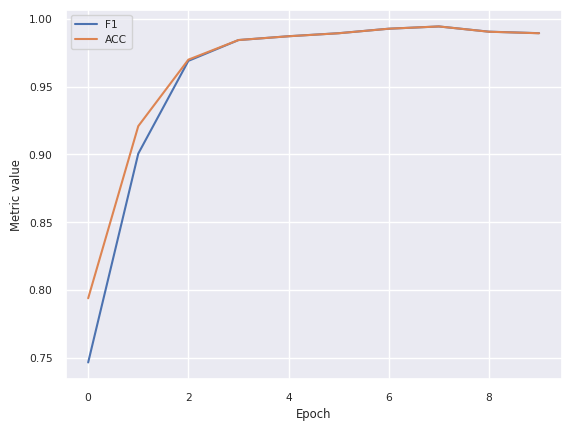

In [ ]:
import matplotlib.pyplot as plt


plt.plot(summary['f1_history'], label='F1')
plt.plot(summary['acc_history'], label='ACC')
plt.legend()

plt.xlabel('Epoch')
plt.ylabel('Metric value')

plt.show()

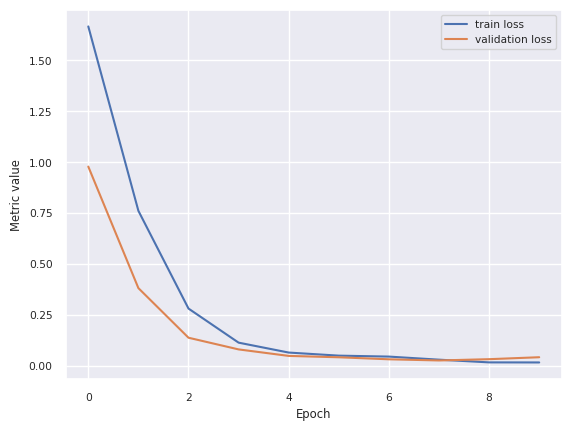

In [ ]:
import matplotlib.pyplot as plt

plt.plot(summary['train_loss_history'], label='train loss')
plt.plot(summary['val_loss_history'], label='validation loss')
plt.legend()

plt.xlabel('Epoch')
plt.ylabel('Metric value')

plt.show()

Plotando todas as matrizes confusão

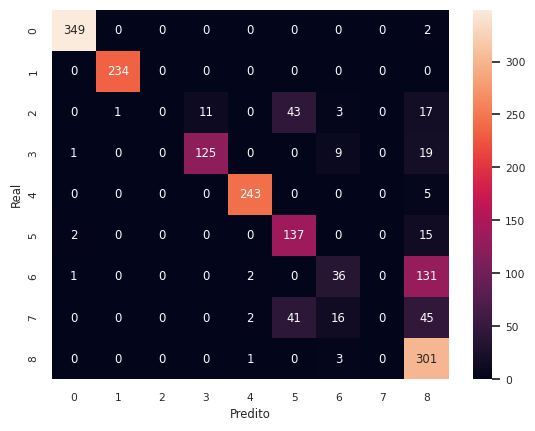

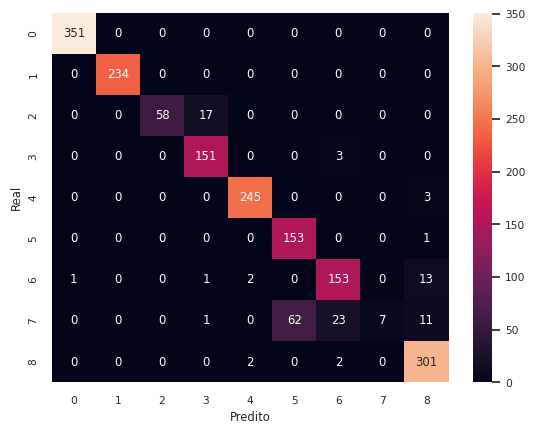

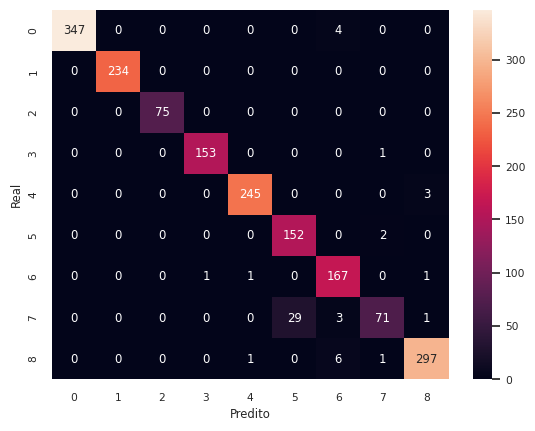

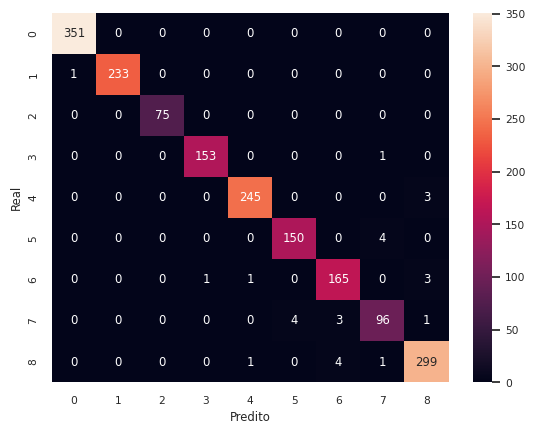

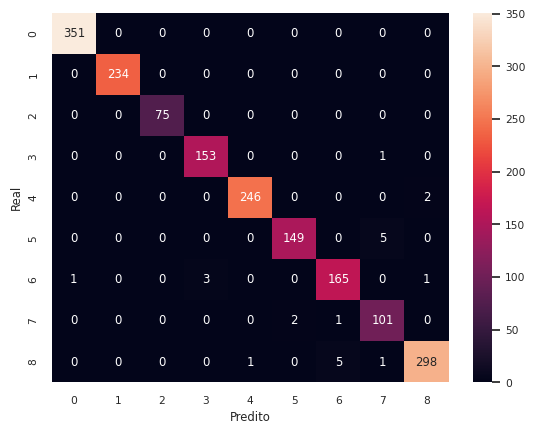

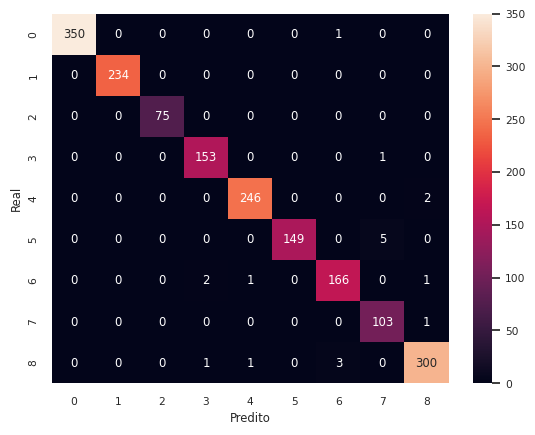

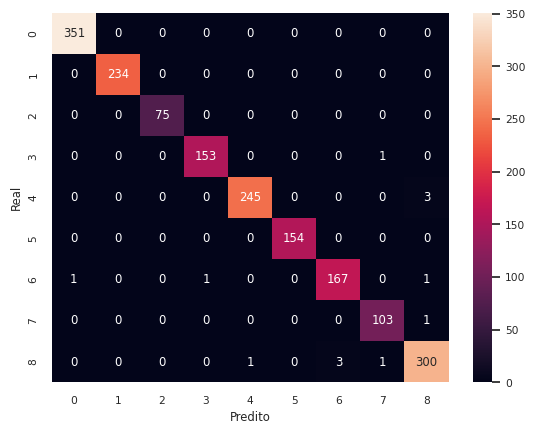

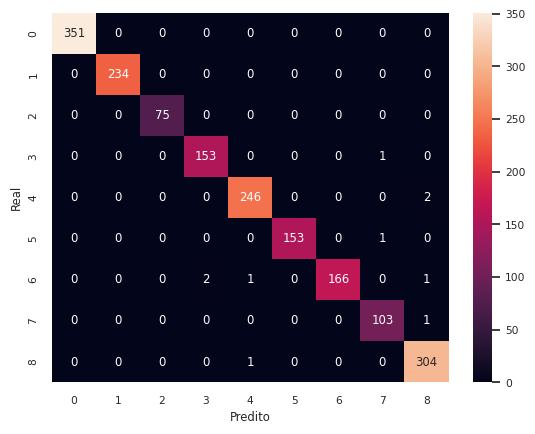

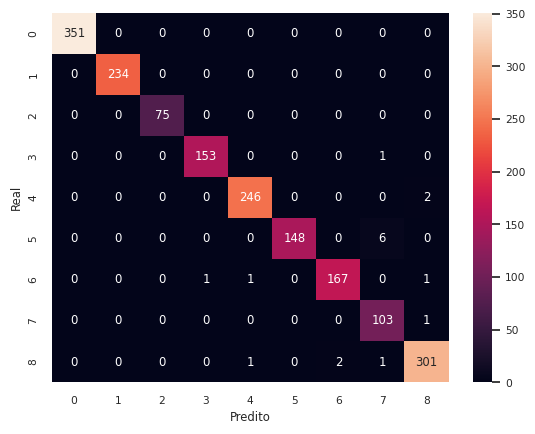

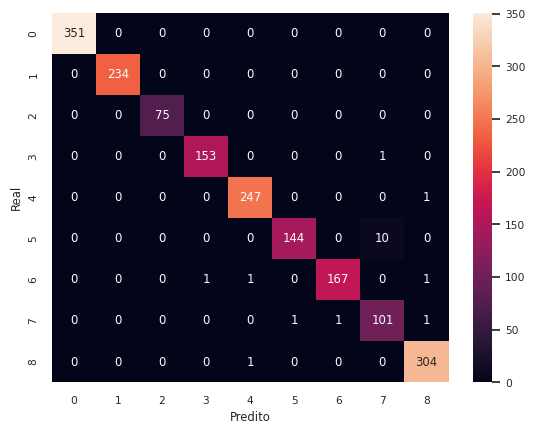

In [ ]:
import matplotlib.pyplot as plt

for idx in range(len(summary['cm_history'])):

  sns.set(font_scale=0.7) # para ajustar o tamanho da fonte
  sns.heatmap(summary['cm_history'][idx], label='F1', annot=True, fmt='g')

  plt.xlabel('Predito')
  plt.ylabel('Real')

  plt.show()